<a href="https://colab.research.google.com/github/Yulia-Kryukova-1201/scientific-research-seminar/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## место для необходимых импортов

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot
import scipy.stats as stats

'''
Не забудьте импортировать необходимые библиотеки для анализа данных

'''

'\nНе забудьте импортировать необходимые библиотеки для анализа данных\n\n'

In [3]:
from google.colab import files

uploaded = files.upload()


Saving reg_data.csv to reg_data.csv


In [4]:
df = pd.read_csv('reg_data.csv')

In [6]:
df=df.dropna()

### Домашнее задание по теме "Множественная линейная регрессия"

Вам представлены данные о стоимости квартир в городе У. Необходимо провести исследовательский анализ, **что влияет на стоимость квартиры**.

Наша зависимая переменная у - **цена квартиры** (*price*)

#### Описание переменных набора данных

| Переменная           | Описание                                                                                                                                                                                                 |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **livesp**            | Жилая площадь (в м^2).                                                                                                                                                                            |
| **metrdist**           | Расстояние до ближайшей станции метро.                                                                                                                                                                                    |
| **totsp**      | Общая площадь квартиры (в m^2).                                                                                                                                                                              |
| **walk**            | бинарная переменная (0 - инфраструктура далеко, 1 - инфраструктура в пешей доступности).                                                                                                                                                                        |
| **floor**       | бинарная переменная (0 - не первый этаж, 1 - первый этаж).                                                                                                                                                                     |


**ЗАДАНИЕ 1:** Проанализируйте, значима ли средняя цена в квартирах на первом и не первых этажах (*floor*). Напишите код для t-теста и проинтерпретируйте его

H0: Средняя цена на квартиры не зависит от этажа, котором находится квартира

Н1: Средняя цена на квартиры зависит от этажа, котором находится квартира

Аналитическая интерпретация: В нашем случае p-value < 0.05 (p-value = 0.0000000018), значиn мы отвергаем Н0 и принимаем Н1

содержательная интерпретация: Средняя цена квартиры зависит от этажа, на котором находится квартира

In [8]:
group1 = df[df['floor'] == 1]['price']
group2 = df[df['floor'] ==0]['price']

t_stat, p_value = stats.ttest_ind(group1, group2)
print("Результаты t-теста:")
print(f"t-статистика = {t_stat:.3f}")
print(f"p-значение = {p_value:.30f}")

Результаты t-теста:
t-статистика = 6.038
p-значение = 0.000000001851875101565726453118


**ЗАДАНИЕ 2:** Проанализируйте, значима ли средняя цена в квартирах, общей площадью менее 63 и больше 63 (*totsp*) . Напишите код для t-теста и проинтерпретируйте его

H0: Средняя цена на квартиры не зависит от её общей площади

Н1: Средняя цена на квартиры зависит от её общей площади

Аналитическая интерпретация: В нашем случае p-value < 0.05 (p-value = 0.00000000), значиn мы отвергаем Н0 и принимаем Н1

содержательная интерпретация: Средняя цена квартиры зависит от её общей площади

In [9]:
group1 = df[df['totsp'] <63]['price']
group2 = df[df['totsp'] >63]['price']

t_stat, p_value = stats.ttest_ind(group1, group2)
print("Результаты t-теста:")
print(f"t-статистика = {t_stat:.3f}")
print(f"p-значение = {p_value:.30f}")

Результаты t-теста:
t-статистика = -21.187
p-значение = 0.000000000000000000000000000000


**ЗАДАНИЕ 3**: Постройте множественную регрессию, включив все переменные, **(кроме totsp)** в регрессию. В качестве зависимой переменной берем **price**.

In [10]:
df = df.dropna()
df.describe()

,price,livesp,metrdist,totsp,walk,floor
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,127.496569,46.337255,8.117157,73.084314,0.685784,0.790686
std,51.878220,7.894348,3.815574,15.123450,0.464317,0.406918
min,50.000000,28.000000,1.000000,44.000000,0.000000,0.000000
25%,95.000000,42.000000,5.000000,62.000000,0.000000,1.000000
50%,115.000000,45.000000,7.000000,73.500000,1.000000,1.000000
75%,142.000000,50.000000,10.000000,79.000000,1.000000,1.000000
max,730.000000,102.000000,20.000000,192.000000,1.000000,1.000000


In [11]:
model = smf.ols('price ~ livesp + metrdist + walk + floor', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     648.5
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:05:53   Log-Likelihood:                -10112.
No. Observations:                2040   AIC:                         2.023e+04
Df Residuals:                    2035   BIC:                         2.026e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -91.7356      5.117    -17.928      0.0

**ЗАДАНИЕ 4**: Проинтерпретируйте результаты, полученные в модели (**коэффициенты**) - и методологически (через p-value) и содержательно (с точки зрения смысла).

In [ ]:
'''
1) Зависимость между средней ценной на квартиру и жилым площади.

Н0: Средняя цена на квартиру не зависит от жилой площади.

Н1: Средняя цена на квартиру зависит от жилой площади.

Pi-value: 0.000 --> Принимаем Н1

Содержательная интерпретация: Чем больше жилая площадь квартиры, тем больше её средняя стоимость (Связь положительная, поскольку ценность квартиры измеряется в количестве квадратных метров жилого пространства, и цена, являясь количественным отображением ценности, будет положительно зависеть от жилой площади)

Жилая площадь (х) повышает среднюю цену квартиры в среднем на 4.67 при прочих равных условиях

2)Зависимость между средней ценой на квартиру и расстоянием до ближайшей станции метро.

Н0: Средняя цена на квартиру не зависит от расстояния до ближайшей станции метро.

Н1: Средняя цена на квартиру зависит от расстояния до ближайшей станции метро.

Pi-value: 0.000 --> Принимаем Н1

Содержательная интерпретация: Чем больше расстояние до ближайшей станции метро, тем меньше средняя стоимость квартиры (Связь отрицательная, поскольку одним из ключевых факторов выбора квартиры является близость к метро и наличие этого фактора увеличивает шансы продать квартиру)

Отдалённость от метро (х) снижает среднюю цену квартиры в среднем на 1.49 при прочих равных условиях

3) Зависимость между средней ценой на квартиру и доступностью инфраструктуры.

Н0: Средняя цена на квартиру не зависит от доступности инфрастуктуры.

Н1: Средняя цена на квартиру зависит от доступности инфрастуктуры.

Pi-value: 0.000 --> Принимаем Н1

Содержательная интерпретация: Факт близости инфраструктуры к квартире повышает среднюю стоимость квартиры
Доступность инфрастуктуры (х) повышает среднюю цену квартиры в среднем на 11.84 при прочих равных условиях

4) Зависимость между средней ценой на квартиру и номера этажа квартиры.

Н0: Средняя цена на квартиру не зависит от номера этажа.

Н1: Средняя цена на квартиру зависит от номера этажа.

Pi-value: 0.000 --> Принимаем Н1

Содержательная интерпретация: Факт нахождения квартиры на первом этаже повышает среднюю стоимость квартиры.

Нахождение квартиры на первом этаже (х) повышает среднюю цену квартиры в среднем на 8.30 при прочих равных условиях



'''

**ЗАДАНИЕ 5**: Постройте график распределения остатков и скажите, нормально ли они распределены. Сделайте вывод о валидности выводов регрессии

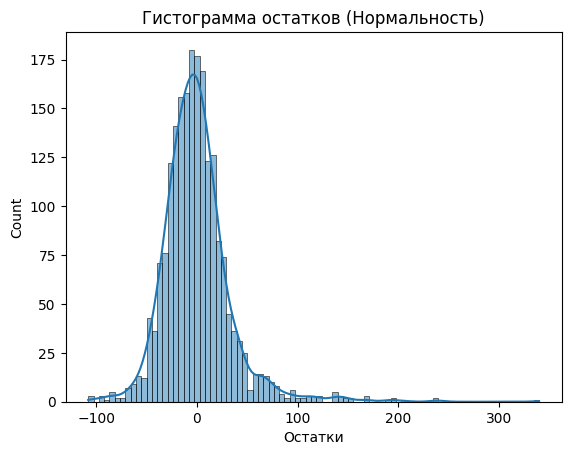

In [13]:
residuals = results.resid
sns.histplot(residuals, kde=True)
plt.title("Гистограмма остатков (Нормальность)")
plt.xlabel("Остатки")
plt.show()

Остатки распределены нормально

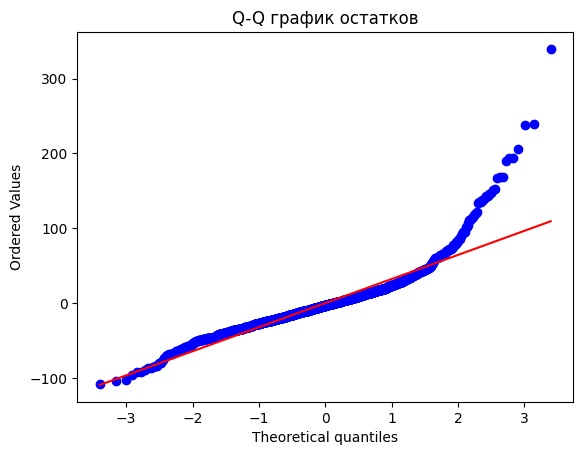

In [14]:
probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q график остатков")
plt.show()

**Вывод о валидности**

Модель адекватно описывает данные, и выводы, основанные на этой модели, могут быть валидными.

Нормальное распределение остатков можнт указывать на выполнение основных предположений о линейной регрессии и достоверность статистических тестов.